## Courts and Rinks in Pittsburgh

The dataset that I will be using is titled "City Courts and Rinks"

Link to the dataset: https://data.wprdc.org/dataset/city-of-pittsburgh-courts

When considering what neighborhood is the most family-friendly, I decided to look at the courts and rinks in Pittsburgh.
You may be asking, "Why courts and rinks?". Well, when raising a family, sports and physical activity is an important aspect of both childhood and family life. Sports play an important role in the life of many children and teenagers, as it provides them with an activity to fill their time with, make friends, and gain skills. Having access to courts and rinks provides an outlet for children and a day activity for family life.

In [1]:
#A bunch of imports so that we can analyze and visualize the courts and rinks dataset!
import pandas as pd 
import numpy as np
import matplotlib as mpl
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

So, let's start with just looking at the dataset

In [2]:
court = pd.read_csv("courtsAndRinks.csv") #Reading in the data file
court.head(246) #Printing all of the entries

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1256692000,Riverview Park Tennis Court 2,Tennis,Riverview Park,NaN,NaN,0,NaN,Perry North,1,26,42003980400,1,26,1,1-15,40.482342,-80.022263
242,1802795636,West End Park Basketball Court,Basketball (Half),West End Park,NaN,Asphalt,0,NaN,Elliott,2,20,42003562600,5,20,6,1-17,40.437395,-80.036929
243,529313558,Frick Park Pickleball Court 1,Pickleball,Frick Park,NaN,Asphalt,0,NaN,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429997,-79.914029
244,1330544431,Frick Park Pickleball Court 2,Pickleball,Frick Park,NaN,Asphalt,0,NaN,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429906,-79.914023


One thing that is important to consider when looking at this dataset is that there is a column titled "inactive". We don't want to consider courts that are inactive, and therefore we should get rid of the courts and rinks that are considered not active before we continue with our analysis.

In [3]:
activeCourt = court.query('inactive == "f"') #Filtering out inactive courts 
activeCourt.head(229) #Print out the dataset again, but this time with only active courts

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1290615572,Moore Park Pickleball Court 1,Pickleball,Moore Park,NaN,NaN,0,f,Brookline,4,19,42003191700,5,19,6,4-26,40.404887,-80.014715
225,1066241176,Moore Park Pickleball Court 2,Pickleball,Moore Park,NaN,NaN,0,f,Brookline,4,19,42003191700,5,19,6,4-26,40.404821,-80.014735
226,452184,Schenley Park Pickleball Court 2,Pickleball,Schenley Park,NaN,Asphalt,0,f,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431925,-79.943224
227,1837773733,Schenley Park Pickleball Court 3,Pickleball,Schenley Park,NaN,Asphalt,0,f,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431742,-79.943177


One thing I want to look at when looking at this dataset is the amount of courts and rinks found within each neighborhood.

In [4]:
activeCourt['neighborhood'].value_counts() #Printing out all of counts of each of the neighborhood


Squirrel Hill South         23
Highland Park               20
Hazelwood                   10
Beltzhoover                  9
Brookline                    9
Allegheny Center             8
Beechview                    7
Sheraden                     6
Regent Square                6
East Liberty                 6
Lower Lawrenceville          6
Manchester                   6
South Side Slopes            5
Terrace Village              5
South Side Flats             5
Mount Washington             5
Bloomfield                   5
Greenfield                   5
Spring Hill-City View        4
Lincoln Place                4
Morningside                  4
Elliott                      4
Carrick                      3
Garfield                     3
Banksville                   3
Oakwood                      3
Crafton Heights              3
Troy Hill                    3
Upper Lawrenceville          2
East Carnegie                2
Stanton Heights              2
South Oakland                2
West End

Looking at this, this result tells us that Squirrel Hill South has the largest number of courts and rinks out of all of the neighboorhood.

The number of courts is a good way of looking at this data. This tells us how many active courts and rinks there are per neighborhood, and provides the most availability to families for options on where to play sports at.

Now, let's visualize this data using a bar graph.

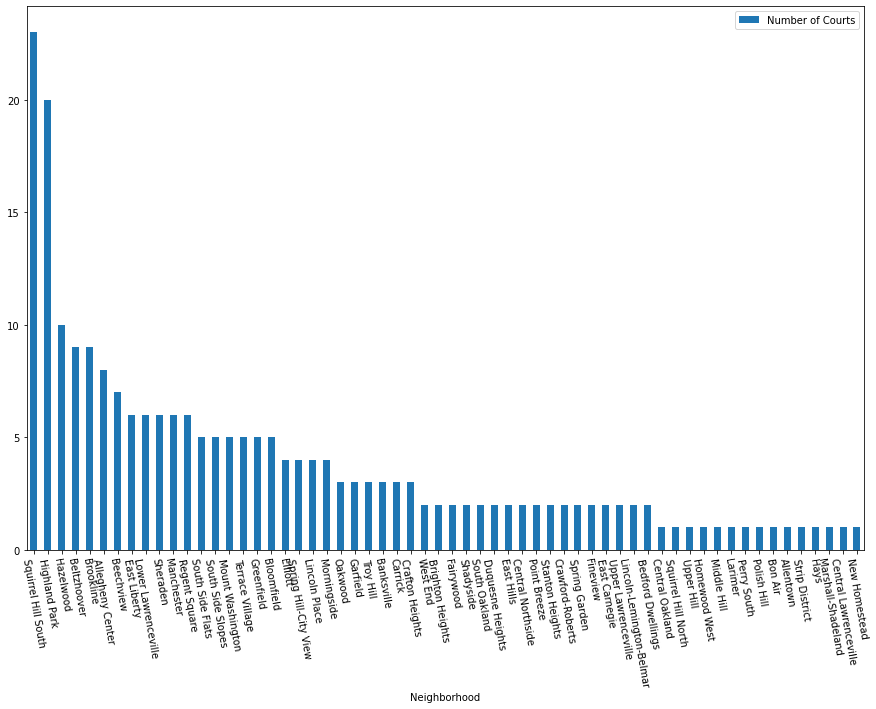

In [5]:
courtGraph = pd.DataFrame({'Neighborhood':['Squirrel Hill South', 'Highland Park', 'Hazelwood', 'Beltzhoover', 'Brookline', 'Allegheny Center', 'Beechview', 'East Liberty', 'Lower Lawrenceville', 'Sheraden', 'Manchester', 'Regent Square', 'South Side Flats', 'South Side Slopes', 'Mount Washington', 'Terrace Village', 'Greenfield', 'Bloomfield', 'Elliott', 'Spring Hill-City View', 'Lincoln Place', 'Morningside','Oakwood', 'Garfield', 'Troy Hill', 'Banksville', 'Carrick', 'Crafton Heights', 'West End',  'Brighton Heights',  'Fairywood',  'Shadyside', 'South Oakland',  'Duquesne Heights',   'East Hills', 'Central Northside',  'Point Breeze', 'Stanton Heights',  'Crawford-Roberts', 'Spring Garden',  'Fineview', 'East Carnegie', 'Upper Lawrenceville',  'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Central Oakland', 'Squirrel Hill North',  'Upper Hill', 'Homewood West', 'Middle Hill', 'Larimer', 'Perry South', 'Polish Hill', 'Bon Air', 'Allentown', 'Strip District', 'Hays', 'Marshall-Shadeland', 'Central Lawrenceville', 'New Homestead'], 'Number of Courts':[23, 20, 10, 9, 9, 8, 7, 6, 6, 6, 6, 6, 5, 5, 5,  5, 5, 5,  4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]}) #Creating the dataframe for the graph
ax = courtGraph.plot.bar(x='Neighborhood', y='Number of Courts', rot=1000, figsize =(15, 10)) #Creating the bar graph

This gives us a nice visualization for our data. The majority of neighborhoods have less than 5 courts and rinks, while a few neighborhoods have between 5 and 10 parks and rinks, and two neighborhoods have more than 20 courts and rinks. 

The number of courts and rinks per neighborhood provides us with a useful bit of information to work with. However, this doesn't paint the entire picture of the courts and rinks in Pittsburgh. The next thing I want to look at is which neighborhood has the greatest diversity of sports in terms of courts and rinks. Obviously, have a large number of courts is nice but it doesn't give families much variety if all of the courts are only one or two sports.

In [6]:
nbhd_array = ['Squirrel Hill South', 'Highland Park', 'Hazelwood', 'Beltzhoover', 'Brookline', 'Allegheny Center', 'Beechview', 'East Liberty', 'Lower Lawrenceville', 'Sheraden', 'Manchester', 'Regent Square', 'South Side Flats', 'South Side Slopes', 'Mount Washington', 'Terrace Village', 'Greenfield', 'Bloomfield', 'Elliott', 'Spring Hill-City View', 'Lincoln Place', 'Morningside','Oakwood', 'Garfield', 'Troy Hill', 'Banksville', 'Carrick', 'Crafton Heights', 'West End',  'Brighton Heights',  'Fairywood',  'Shadyside', 'South Oakland',  'Duquesne Heights',   'East Hills', 'Central Northside',  'Point Breeze', 'Stanton Heights',  'Crawford-Roberts', 'Spring Garden',  'Fineview', 'East Carnegie', 'Upper Lawrenceville',  'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Central Oakland', 'Squirrel Hill North',  'Upper Hill', 'Homewood West', 'Middle Hill', 'Larimer', 'Perry South', 'Polish Hill', 'Bon Air', 'Allentown', 'Strip District', 'Hays', 'Marshall-Shadeland', 'Central Lawrenceville', 'New Homestead'] #Creating an array with the neighborhoods in Pittsburgh

for nbhd in nbhd_array: #For each neighborhood in the array,
    nbhdquery = activeCourt.query('neighborhood == \"' + nbhd + '\"') #Look for the entries with the specific neighborhood
    count = nbhdquery['type'].nunique()
    print(nbhd + ": " + str(count))

Squirrel Hill South: 6
Highland Park: 5
Hazelwood: 4
Beltzhoover: 3
Brookline: 5
Allegheny Center: 3
Beechview: 3
East Liberty: 3
Lower Lawrenceville: 3
Sheraden: 3
Manchester: 3
Regent Square: 1
South Side Flats: 4
South Side Slopes: 3
Mount Washington: 3
Terrace Village: 2
Greenfield: 3
Bloomfield: 4
Elliott: 3
Spring Hill-City View: 3
Lincoln Place: 3
Morningside: 2
Oakwood: 2
Garfield: 2
Troy Hill: 2
Banksville: 3
Carrick: 2
Crafton Heights: 2
West End: 1
Brighton Heights: 2
Fairywood: 1
Shadyside: 1
South Oakland: 2
Duquesne Heights: 2
East Hills: 1
Central Northside: 1
Point Breeze: 1
Stanton Heights: 2
Crawford-Roberts: 2
Spring Garden: 1
Fineview: 2
East Carnegie: 2
Upper Lawrenceville: 2
Lincoln-Lemington-Belmar: 1
Bedford Dwellings: 1
Central Oakland: 1
Squirrel Hill North: 1
Upper Hill: 1
Homewood West: 1
Middle Hill: 1
Larimer: 1
Perry South: 1
Polish Hill: 1
Bon Air: 1
Allentown: 1
Strip District: 1
Hays: 1
Marshall-Shadeland: 1
Central Lawrenceville: 1
New Homestead: 1


From the print statements, we can tell that the neighborhood with the greatest amount of different sports is Squirrel Hill South. This is not a surprising result, as we determined earlier that the neighborhood with the greatest number of sports is Squirrel Hill South. 

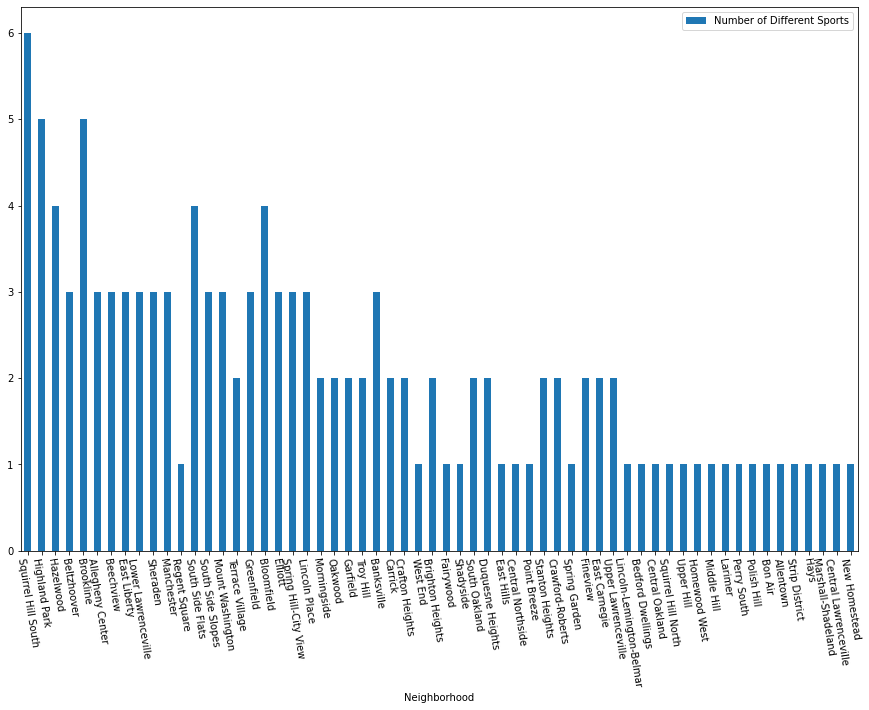

In [18]:
numSports = pd.DataFrame({'Neighborhood':['Squirrel Hill South', 'Highland Park', 'Hazelwood', 'Beltzhoover', 'Brookline', 'Allegheny Center', 'Beechview', 'East Liberty', 'Lower Lawrenceville', 'Sheraden', 'Manchester', 'Regent Square', 'South Side Flats', 'South Side Slopes', 'Mount Washington', 'Terrace Village', 'Greenfield', 'Bloomfield', 'Elliott', 'Spring Hill-City View', 'Lincoln Place', 'Morningside','Oakwood', 'Garfield', 'Troy Hill', 'Banksville', 'Carrick', 'Crafton Heights', 'West End',  'Brighton Heights',  'Fairywood',  'Shadyside', 'South Oakland',  'Duquesne Heights',   'East Hills', 'Central Northside',  'Point Breeze', 'Stanton Heights',  'Crawford-Roberts', 'Spring Garden',  'Fineview', 'East Carnegie', 'Upper Lawrenceville',  'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Central Oakland', 'Squirrel Hill North',  'Upper Hill', 'Homewood West', 'Middle Hill', 'Larimer', 'Perry South', 'Polish Hill', 'Bon Air', 'Allentown', 'Strip District', 'Hays', 'Marshall-Shadeland', 'Central Lawrenceville', 'New Homestead'], 'Number of Different Sports':[6, 5, 4, 3, 5, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})
ax = numSports.plot.bar(x='Neighborhood', y='Number of Different Sports', rot=999999999, figsize =(15, 10))

This, once again, gives us a nice visualization for our data. From this data, we can easily see that Squirrel Hill South has the greatest number of sports in terms of courts and rinks with 6 different sports. Highland Park and Allegheny Center both are close seconds with 5 different sports.

## Conclusion 

Squirrel Hill South has the largest number of courts and rinks with 23 courts and rinks. Squirrel Hill South also has the most variety in the type of courts with 6 types of courts and rinks. Therefore, Squirrel Hill South is the clear winner in terms of having the largest number of and most diverse range of courts and rinks. In relation to being family friendly, Squirrel Hill South would provide the greatest and most diverse amount of recreation for a family in the area.